# Import Necassary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_campaign.csv',sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [3]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [4]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue", "ID"],axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [5]:
df.shape

(2240, 26)

In [6]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],infer_datetime_format=True )

 # Checking for null values

In [7]:
df.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

<AxesSubplot:>

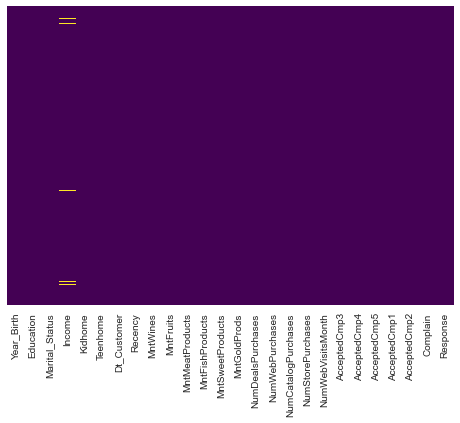

In [8]:
#Plotting  Null Values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df['Income']=df['Income'].fillna(df['Income'].median())

# New Variables

In [10]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [11]:
#Age
df['Cust_age'] = 2014- df['Year_Birth']
#Total Spent
df['TotalSpent'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
#Number of purchase
df['NumAllPurchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
# Number of children
df["No_Of_Children"] = df.Kidhome + df.Teenhome
df["Has_Child"] = np.where(df.No_Of_Children > 0, "Has Child", "No Child")

# dividing age into groups
df['Age_Group'] = pd.cut(x = df['Cust_age'], bins = [1, 17, 24, 44, 64, 90],
                         labels = ['Under 18','Young adult','Adult','Middel Aged','Senior Citizen'])
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cust_age,TotalSpent,NumAllPurchases,No_Of_Children,Has_Child,Age_Group
0,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,22,0,No Child,Middel Aged
1,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,4,2,Has Child,Middel Aged
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,20,0,No Child,Middel Aged
3,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,6,1,Has Child,Adult
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,14,1,Has Child,Adult


In [14]:
df['yyyy-mm'] = pd.to_datetime(df['Dt_Customer']).dt.strftime('%Y-%m')

In [16]:
# number of days the customers started to shop in the store
days = []
d1 = max(df.Dt_Customer) #taking it to be the newest customer
for i in df.Dt_Customer:
    delta = d1 - i
    delta = delta.days
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")


In [17]:
# Label encoding Family size
df["Living_With"]=df["Marital_Status"].replace(
    {"Married":"Relationship", "Together":"Relationship", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", 
     "Divorced":"Alone", "Single":"Alone",})

df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Relationship":2})+ df["No_Of_Children"]


In [18]:
df = df.drop(['Year_Birth'],axis=1)
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cust_age,TotalSpent,NumAllPurchases,No_Of_Children,Has_Child,Age_Group,yyyy-mm,Customer_For,Living_With,Family_Size
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,22,0,No Child,Middel Aged,2012-04,971,Alone,1
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,4,2,Has Child,Middel Aged,2014-08,125,Alone,3
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,20,0,No Child,Middel Aged,2013-08,472,Relationship,2
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,6,1,Has Child,Adult,2014-10,65,Relationship,3
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,14,1,Has Child,Adult,2014-01,321,Relationship,3


In [19]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [20]:
df.groupby('Education')['Marital_Status'].count()

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: Marital_Status, dtype: int64

In [21]:
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')

# Outliers

In [22]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Cust_age', 'TotalSpent', 'NumAllPurchases',
       'No_Of_Children', 'Has_Child', 'Age_Group', 'yyyy-mm', 'Customer_For',
       'Living_With', 'Family_Size'],
      dtype='object')

<AxesSubplot:ylabel='Cust_age'>

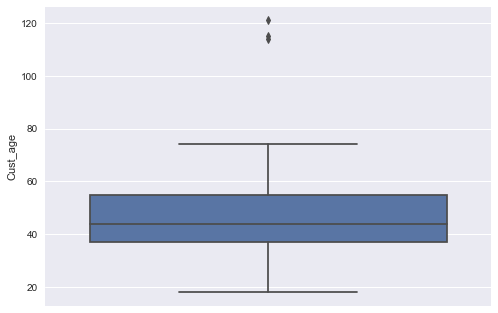

In [23]:
sns.boxplot(y=df.Cust_age)

<AxesSubplot:ylabel='Income'>

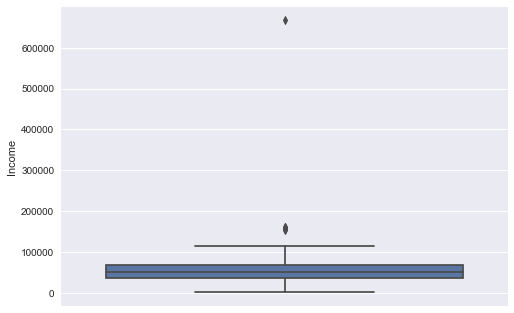

In [24]:
sns.boxplot(y=df.Income)

In [25]:
Q1 = df["Income"].quantile(0.25)

Q3 = df["Income"].quantile(0.75)

IQR = Q3 - Q1

Lower_Fence = Q1 - (1.5 * IQR)

Upper_Fence = Q3 + (1.5 * IQR)
print(Lower_Fence,Upper_Fence)

-13587.75 117416.25


In [26]:
df = df[df.Income<195348.5]
df.shape

(2239, 35)

In [27]:
df.Income.min()

1730.0

In [28]:
df = df[df.Cust_age<84]

df.shape

(2236, 35)

# EDA

<BarContainer object of 6 artists>

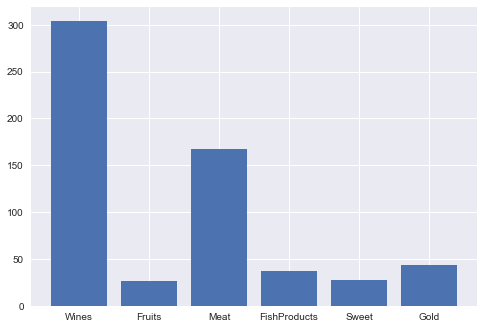

In [12]:
amount = [df.MntWines.mean(), df.MntFruits.mean(),df.MntMeatProducts.mean(), df.MntFishProducts.mean(), df.MntSweetProducts.mean(),df.MntGoldProds.mean()]
products = ['Wines', 'Fruits', 'Meat', 'FishProducts', 'Sweet','Gold']
plt.bar(products, amount)

## Customer Age vs Total Spent

<AxesSubplot:xlabel='Cust_age', ylabel='TotalSpent'>

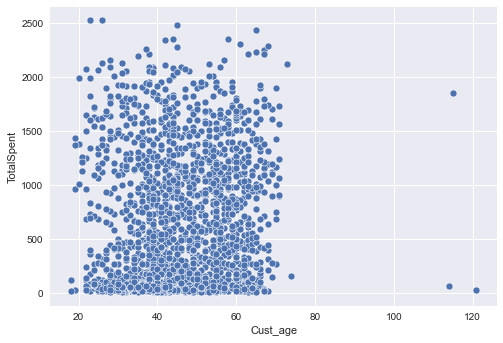

In [13]:
sns.scatterplot(df.Cust_age,df.TotalSpent)

## How monthly sales vary each month

<AxesSubplot:xlabel='yyyy-mm'>

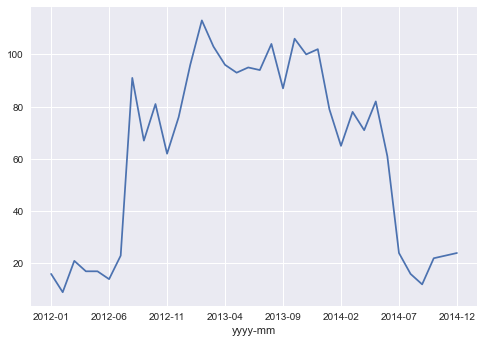

In [15]:
df_month = df.groupby('yyyy-mm')['Education'].count()
df_month.plot()

## Correlation

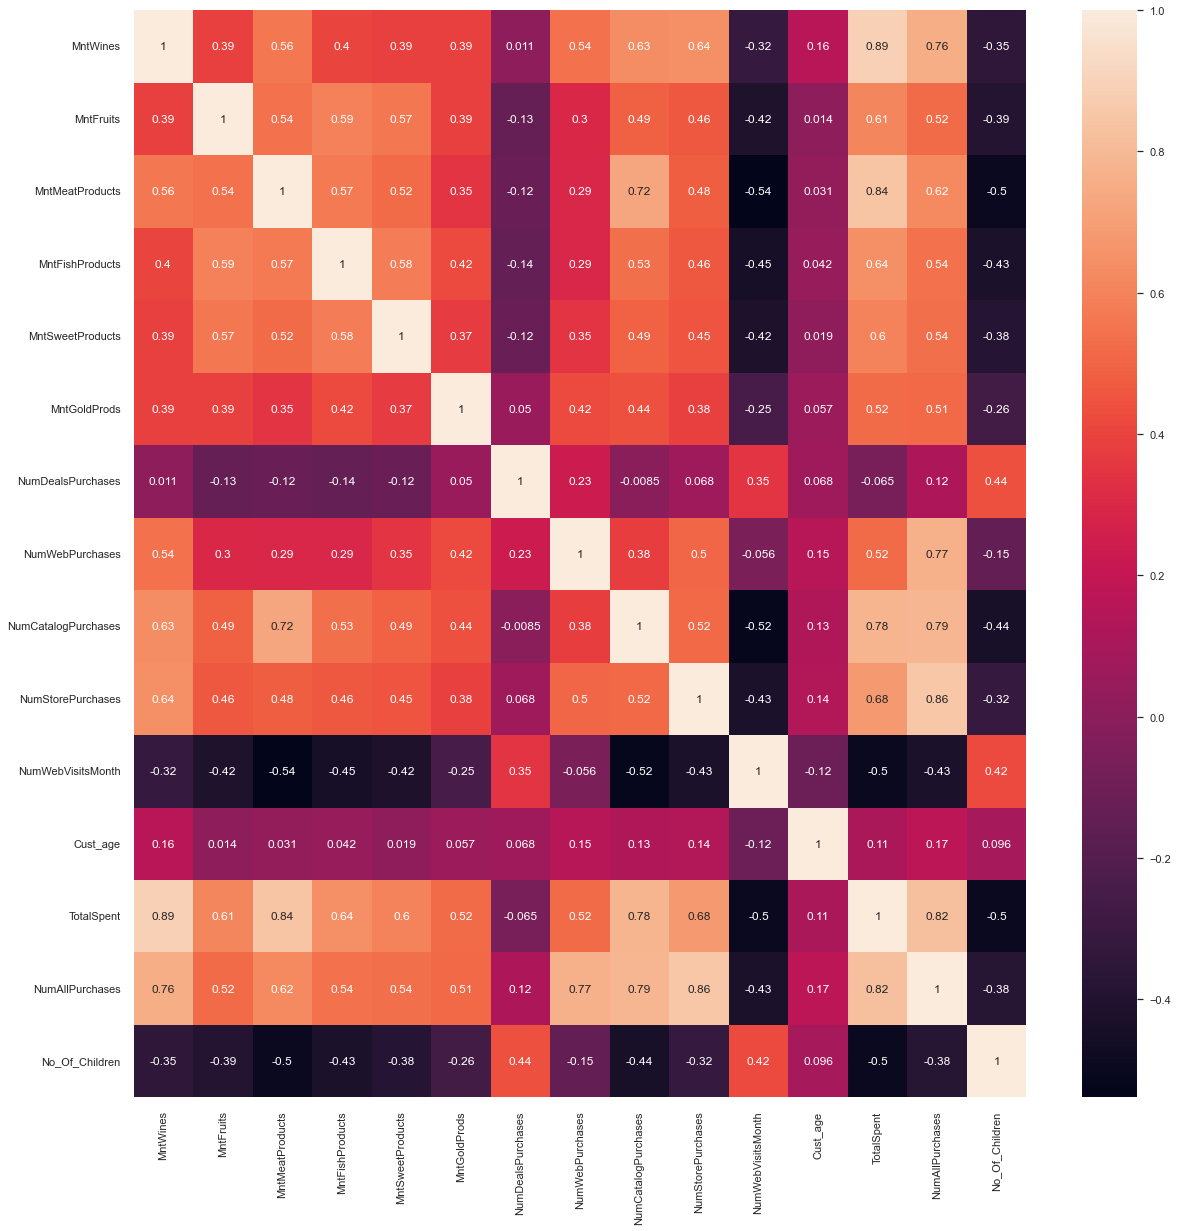

In [30]:
plt.figure(figsize=(20,20))
sns.set(font_scale = 1)
sns.heatmap(df[['MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Cust_age', 'TotalSpent', 'NumAllPurchases',
       'No_Of_Children']].corr(), annot=True)
plt.show()

## Education Status

([<matplotlib.patches.Wedge at 0x23bd816b670>,
 [Text(-0.012363827040596909, 1.099930514069371, 'Graduation'),
  Text(-0.746624052271929, -0.8078072323079586, 'PhD'),
  Text(0.7397877783420178, -0.8140725047658727, 'Master'),
  Text(1.0968355523730828, -0.083377281380689, 'Basic')],
 [Text(-0.006743905658507404, 0.5999620985832931, '50%'),
  Text(-0.40724948305741576, -0.4406221267134319, '26%'),
  Text(0.4035206063683733, -0.44403954805411233, '22%'),
  Text(0.598273937658045, -0.045478517116739454, '2%')])

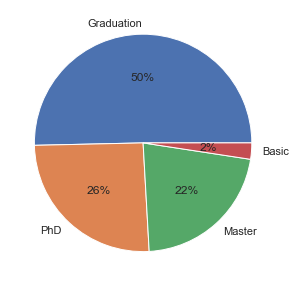

In [31]:
plt.figure(figsize=(5,5))
colors = sns.color_palette('dark')
plt.pie(df.Education.value_counts(), labels=df.Education.unique(),autopct='%0.0f%%')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Basic'),
  Text(1, 0, 'Graduation'),
  Text(2, 0, 'Master'),
  Text(3, 0, 'PhD')])

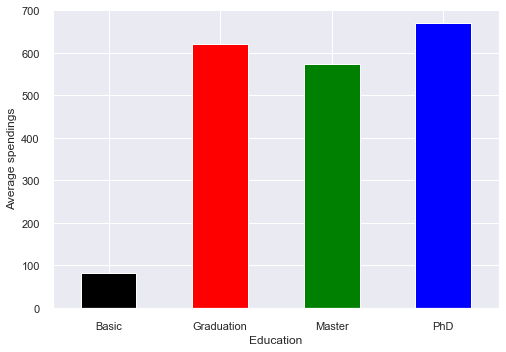

In [32]:
df.groupby('Education')['TotalSpent'].mean().plot.bar(color=['black', 'red', 'green', 'blue', 'yellow'])
plt.ylabel('Average spendings')
plt.xticks(rotation = 0)

In [33]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Cust_age', 'TotalSpent', 'NumAllPurchases',
       'No_Of_Children', 'Has_Child', 'Age_Group', 'yyyy-mm', 'Customer_For',
       'Living_With', 'Family_Size'],
      dtype='object')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Basic'),
  Text(1, 0, 'Graduation'),
  Text(2, 0, 'Master'),
  Text(3, 0, 'PhD')])

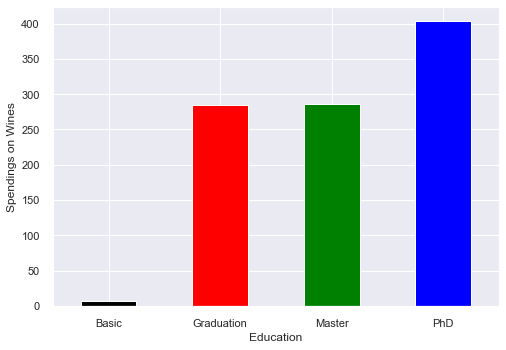

In [34]:
df.groupby('Education')['MntWines'].mean().plot.bar(color=['black', 'red', 'green', 'blue'],label = 'Wines' )
plt.ylabel('Spendings on Wines')
plt.xticks(rotation = 0)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Basic'),
  Text(1, 0, 'Graduation'),
  Text(2, 0, 'Master'),
  Text(3, 0, 'PhD')])

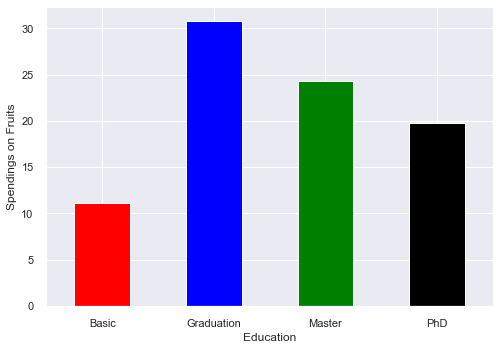

In [35]:
df.groupby('Education')['MntFruits'].mean().plot.bar( color=['red', 'blue', 'green', 'black', 'yellow'], label = 'Fruits')
plt.ylabel('Spendings on Fruits')
plt.xticks(rotation = 0)

Text(0, 0.5, 'Number of deal purchase')

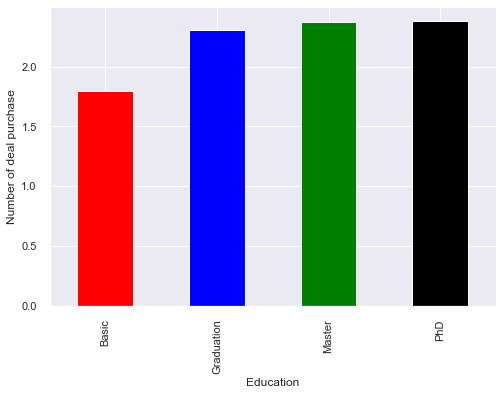

In [36]:
df.groupby('Education')['NumDealsPurchases'].mean().plot.bar(color=['red', 'blue', 'green', 'black', 'yellow'])
plt.ylabel('Number of deal purchase')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'MntWines'),
  Text(1, 0, 'MntMeatProducts'),
  Text(2, 0, 'MntFishProducts'),
  Text(3, 0, 'MntSweetProducts'),
  Text(4, 0, 'MntGoldProds')])

<Figure size 1440x1440 with 0 Axes>

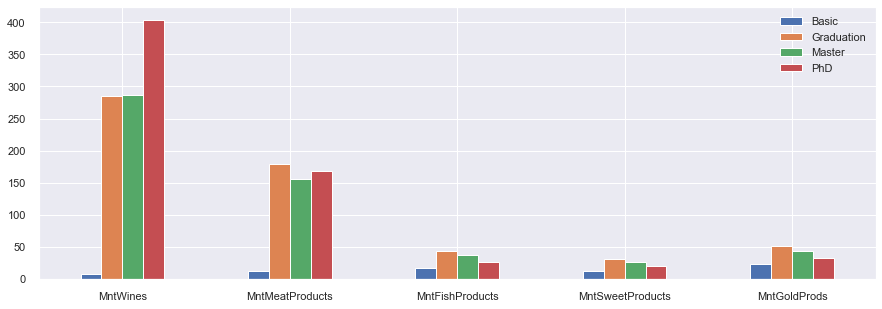

In [37]:
df2 = df.groupby('Education')['MntWines','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'].mean()
df2= df2.reset_index()
df2.head()

data = {#'Amount': ['MntWines','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
        'Basic': df2.iloc[0,1:],
       'Graduation':df2.iloc[1,1:],
    'Master':df2.iloc[2,1:],
    'PhD':df2.iloc[3,1:]
}

df3 = pd.DataFrame(data)
plt.figure(figsize=(20,20))
df3[['Basic', 'Graduation', 'Master', 'PhD']].plot(kind= 'bar',figsize=(15,5))
plt.xticks(rotation = 0)

<AxesSubplot:ylabel='MntWines'>

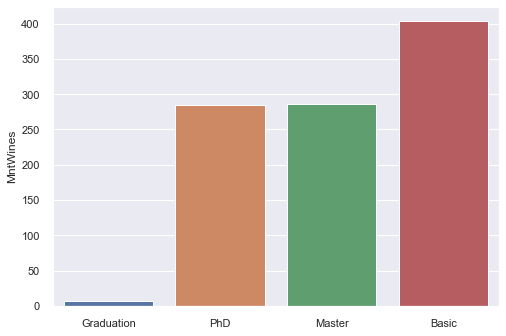

In [38]:
sns.barplot( y = df.groupby('Education')['MntWines'].mean(), x = df.Education.unique())

Text(0.5, 0, '')

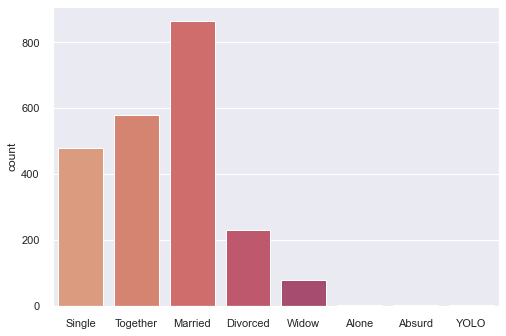

In [39]:
sns.countplot( x =df.Marital_Status , palette = "flare")
plt.xlabel(None)

Text(0.5, 0, '')

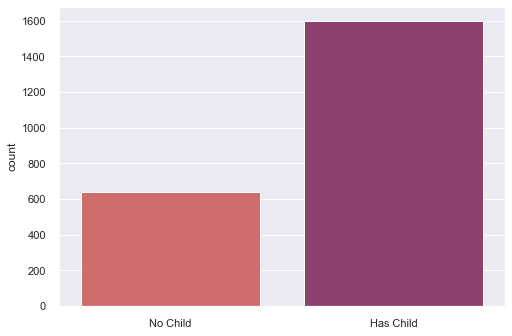

In [40]:
sns.countplot(data = df, x = "Has_Child", palette = "flare")
plt.xlabel(None)

<AxesSubplot:xlabel='Income', ylabel='Count'>

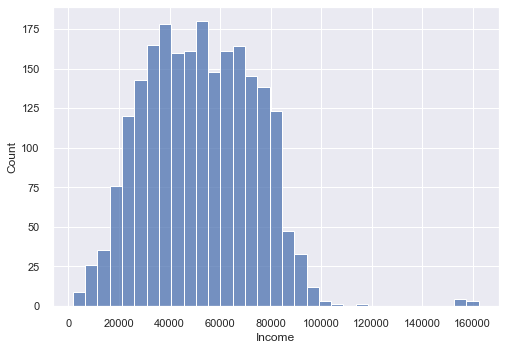

In [41]:
sns.histplot(x=df.Income)

<AxesSubplot:xlabel='Cust_age', ylabel='Count'>

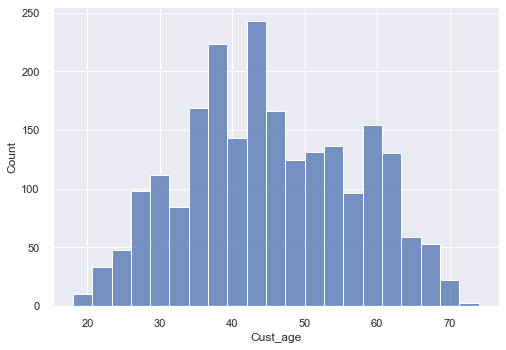

In [42]:
sns.histplot(x=df.Cust_age)

## How Expenses impacts on Education

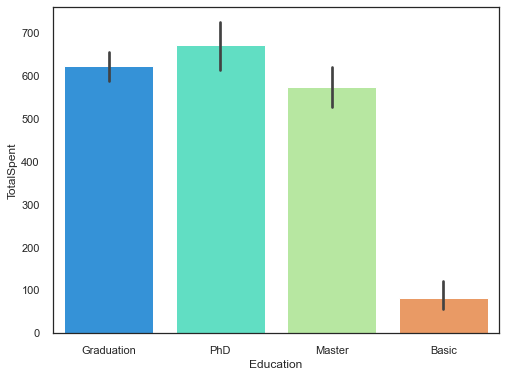

In [43]:
#Bar plot of Education vs Total expense
sns.set_theme(style="white")
plt.figure(figsize=(8,6))
#plt.title("How Expenses impacts on Education?",fontsize=24)
ax = sns.barplot(x="Education", y="TotalSpent", data=df,palette="rainbow")

## How Marital_Status impacts on Education?

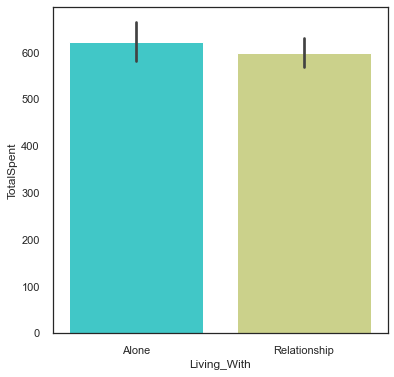

In [44]:
sns.set_theme(style="white")
plt.figure(figsize=(6,6))
#plt.title("How Marital_Status impacts on Total Spent?",fontsize=24)
ax = sns.barplot(x="Living_With", y="TotalSpent", data=df,palette="rainbow")

Text(0, 0.5, 'Number of deal purchase')

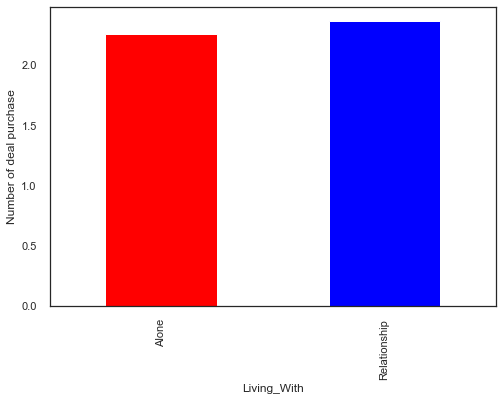

In [45]:
df.groupby('Living_With')['NumDealsPurchases'].mean().plot.bar(color=['red', 'blue', 'green', 'black', 'yellow'])
plt.ylabel('Number of deal purchase')

## How no of Kids impacts on expense?

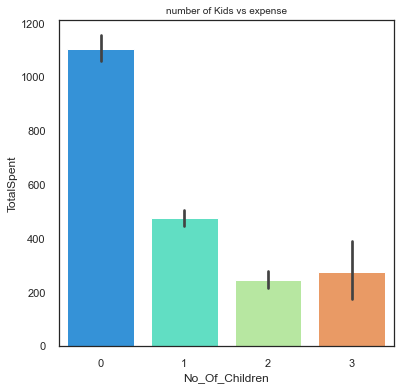

In [46]:
sns.set_theme(style="white")
plt.figure(figsize=(6,6))
plt.title("number of Kids vs expense",fontsize=10)
ax = sns.barplot(x="No_Of_Children", y="TotalSpent", data=df,palette="rainbow")

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

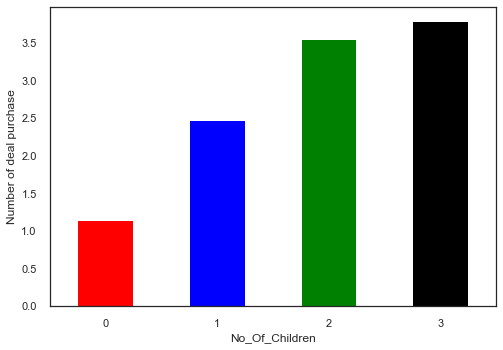

In [47]:
df.groupby('No_Of_Children')['NumDealsPurchases'].mean().plot.bar(color=['red', 'blue', 'green', 'black', 'yellow'])
plt.ylabel('Number of deal purchase')
plt.xticks(rotation = 0)

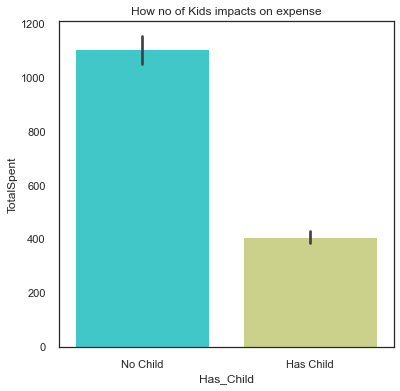

In [48]:
sns.set_theme(style="white")
plt.figure(figsize=(6,6))
plt.title("How no of Kids impacts on expense",fontsize=12)
ax = sns.barplot(x="Has_Child", y="TotalSpent", data=df,palette="rainbow")

In [49]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Cust_age', 'TotalSpent', 'NumAllPurchases',
       'No_Of_Children', 'Has_Child', 'Age_Group', 'yyyy-mm', 'Customer_For',
       'Living_With', 'Family_Size'],
      dtype='object')

In [50]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cust_age,TotalSpent,NumAllPurchases,No_Of_Children,Has_Child,Age_Group,yyyy-mm,Customer_For,Living_With,Family_Size
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,22,0,No Child,Middel Aged,2012-04,971,Alone,1
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,4,2,Has Child,Middel Aged,2014-08,125,Alone,3
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,20,0,No Child,Middel Aged,2013-08,472,Relationship,2
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,6,1,Has Child,Adult,2014-10,65,Relationship,3
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,14,1,Has Child,Adult,2014-01,321,Relationship,3


In [51]:
df.Has_Child.unique()

array(['No Child', 'Has Child'], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'MntWines'),
  Text(1, 0, 'MntMeatProducts'),
  Text(2, 0, 'MntFishProducts'),
  Text(3, 0, 'MntSweetProducts'),
  Text(4, 0, 'MntGoldProds')])

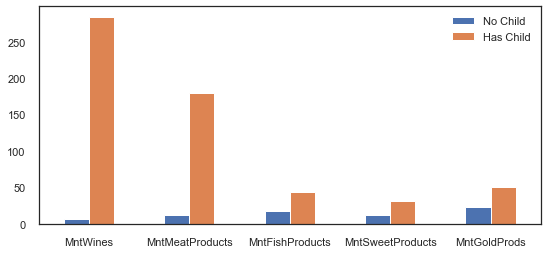

In [52]:
#df.groupby('Has_Child')['MntWines','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'].mean().plot.bar()
#sns.barplot(x=df.Has_Child, y= df.TotalSpent, hue)

data = {#'Amount': ['MntWines','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
        'No Child': df2.iloc[0,1:],
       'Has Child':df2.iloc[1,1:],
}

df3 = pd.DataFrame(data)
#plt.figure(figsize=(20,20))
df3[['No Child', 'Has Child']].plot(kind= 'bar',figsize=(9,4))
plt.xticks(rotation = 0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'MntWines'),
  Text(1, 0, 'MntMeatProducts'),
  Text(2, 0, 'MntFishProducts'),
  Text(3, 0, 'MntSweetProducts'),
  Text(4, 0, 'MntGoldProds')])

<Figure size 1440x1440 with 0 Axes>

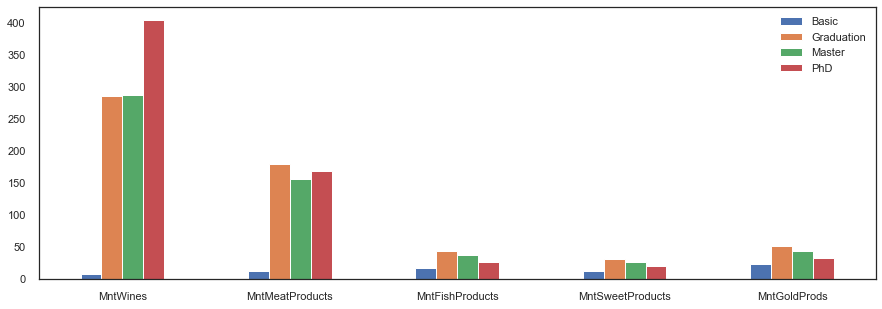

In [53]:
df2 = df.groupby('Education')['MntWines','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'].mean()
df2= df2.reset_index()
df2.head()

data = {#'Amount': ['MntWines','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
        'Basic': df2.iloc[0,1:],
       'Graduation':df2.iloc[1,1:],
    'Master':df2.iloc[2,1:],
    'PhD':df2.iloc[3,1:]
}

df3 = pd.DataFrame(data)
plt.figure(figsize=(20,20))
df3[['Basic', 'Graduation', 'Master', 'PhD']].plot(kind= 'bar',figsize=(15,5))
plt.xticks(rotation = 0)

## Total no of purchase vs education 

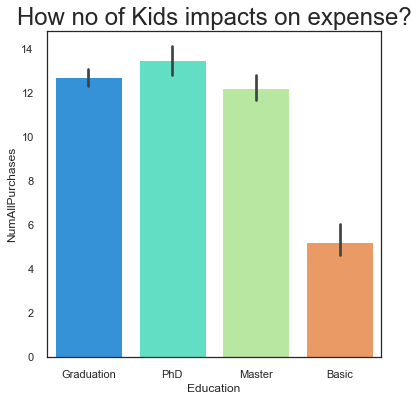

In [54]:
sns.set_theme(style="white")
plt.figure(figsize=(6,6))
plt.title("How no of Kids impacts on expense?",fontsize=24)
ax = sns.barplot(x="Education", y="NumAllPurchases", data=df,palette="rainbow")

In [55]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cust_age,TotalSpent,NumAllPurchases,No_Of_Children,Has_Child,Age_Group,yyyy-mm,Customer_For,Living_With,Family_Size
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,22,0,No Child,Middel Aged,2012-04,971,Alone,1
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,4,2,Has Child,Middel Aged,2014-08,125,Alone,3
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,20,0,No Child,Middel Aged,2013-08,472,Relationship,2
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,6,1,Has Child,Adult,2014-10,65,Relationship,3
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,14,1,Has Child,Adult,2014-01,321,Relationship,3


## Age group VS no of purchase

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Under 18'),
  Text(1, 0, 'Young adult'),
  Text(2, 0, 'Adult'),
  Text(3, 0, 'Middel Aged'),
  Text(4, 0, 'Senior Citizen')])

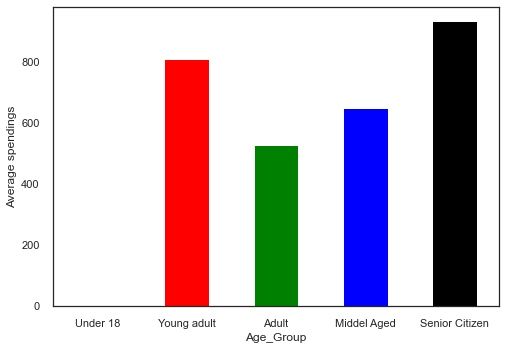

In [56]:
df.groupby('Age_Group')['TotalSpent'].mean().plot.bar(color=['black', 'red', 'green', 'blue', 'black'])
plt.ylabel('Average spendings')
plt.xticks(rotation = 0)

In [57]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Cust_age', 'TotalSpent', 'NumAllPurchases',
       'No_Of_Children', 'Has_Child', 'Age_Group', 'yyyy-mm', 'Customer_For',
       'Living_With', 'Family_Size'],
      dtype='object')

<AxesSubplot:xlabel='Age_Group', ylabel='Income'>

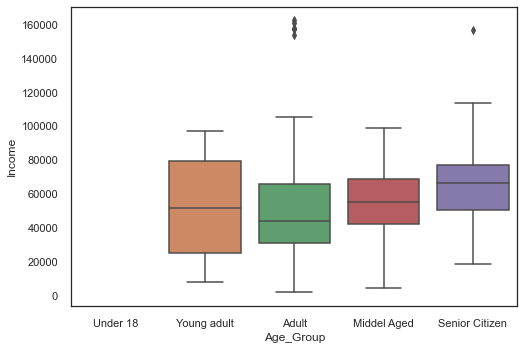

In [58]:
sns.boxplot(y=df.Income, x=df.Age_Group)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'MntWines'),
  Text(1, 0, 'MntMeatProducts'),
  Text(2, 0, 'MntFishProducts'),
  Text(3, 0, 'MntSweetProducts'),
  Text(4, 0, 'MntGoldProds')])

<Figure size 1440x1440 with 0 Axes>

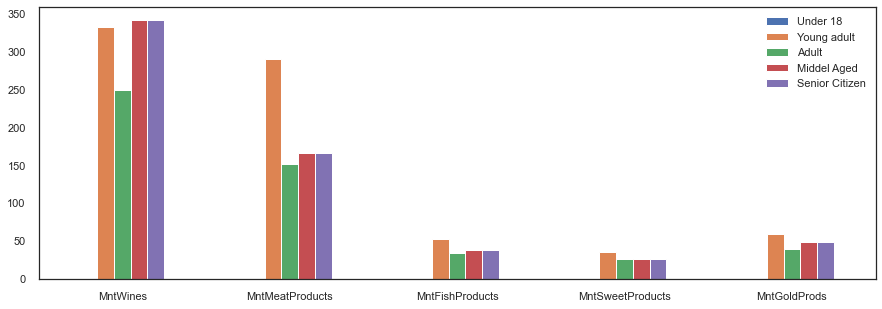

In [59]:
df2 = df.groupby('Age_Group')['MntWines','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'].mean()
df2= df2.reset_index()
df2.head()

data = {#'Amount': ['MntWines','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
        'Under 18': df2.iloc[0,1:],
       'Young adult':df2.iloc[1,1:],
    'Adult':df2.iloc[2,1:],
    'Middel Aged':df2.iloc[3,1:],
    'Senior Citizen':df2.iloc[3,1:]
}

df3 = pd.DataFrame(data)
plt.figure(figsize=(20,20))
df3[['Under 18','Young adult','Adult', 'Middel Aged', 'Senior Citizen']].plot(kind= 'bar',figsize=(15,5))
plt.xticks(rotation = 0)


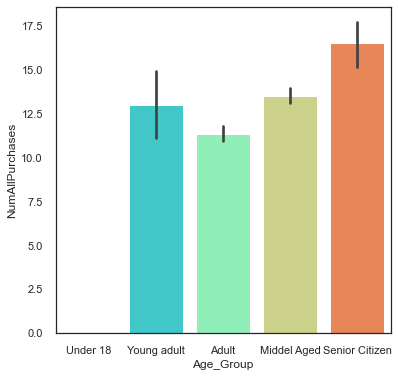

In [61]:
sns.set_theme(style="white")
plt.figure(figsize=(6,6))
#plt.title("How no of Kids impacts on expense?",fontsize=24)
ax = sns.barplot(x="Age_Group", y="NumAllPurchases", data=df,palette="rainbow")

## TypeOfPurchase vs Education

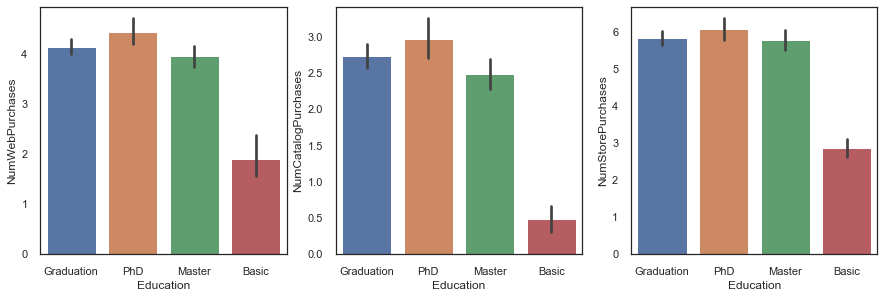

In [62]:
TypeOfPurchase = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']

plt.figure(figsize=(15,10))
a = 2
b = 3
c = 1

for purchaseType in TypeOfPurchase:
    plt.subplot(a,b,c)
    ax = sns.barplot(x =df.Education, y= df[purchaseType])
    c = c+1
    
plt.show()

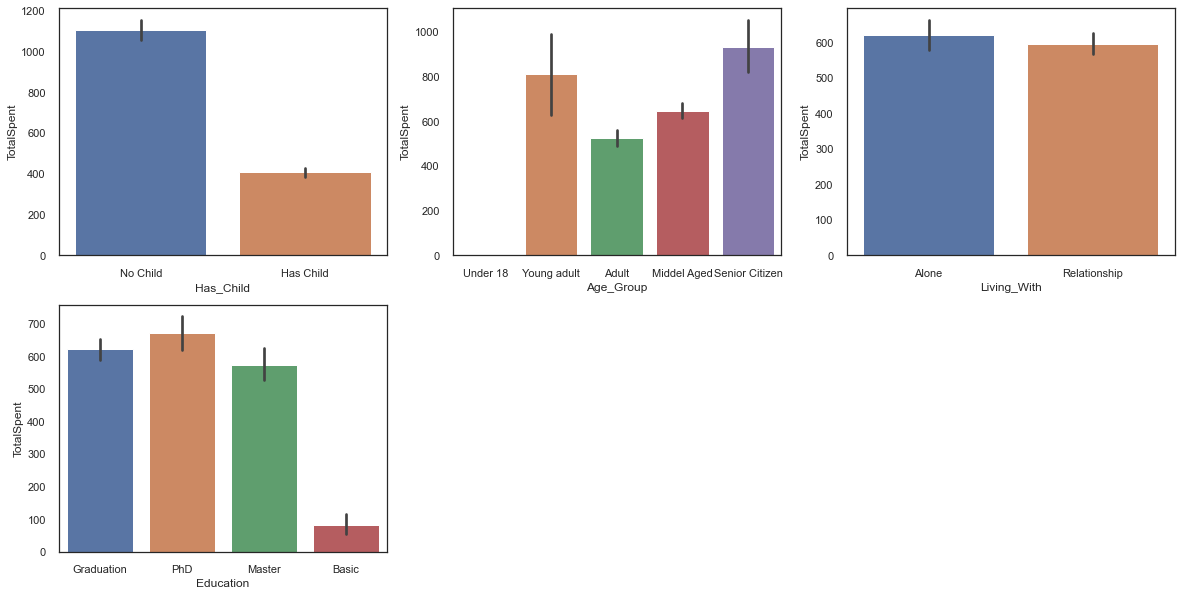

In [63]:
Vars = ['Has_Child','Age_Group','Living_With','Education']

plt.figure(figsize=(20,10))
a = 2
b = 3
c = 1

for Vars in Vars:
    plt.subplot(a,b,c)
    ax = sns.barplot(x =df[Vars], y= df.TotalSpent)
    c = c+1
    
plt.show()

In [65]:
vars1 = ['Cust_age','TotalSpent','NumAllPurchases','No_Of_Children']

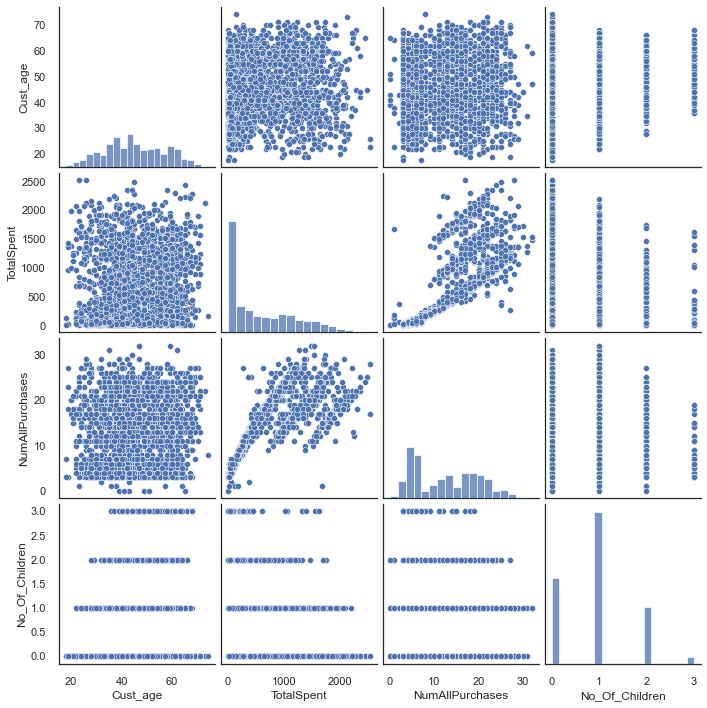

In [66]:
sns.pairplot(data=df[vars1])

<AxesSubplot:xlabel='TotalSpent', ylabel='NumDealsPurchases'>

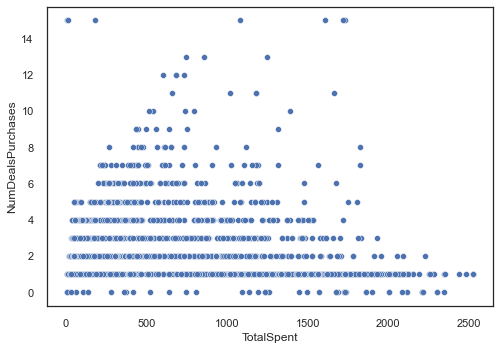

In [67]:
sns.scatterplot(x=df.TotalSpent,y=df.NumDealsPurchases)

 ## checking in which campaign customer accepted the offer 

In [68]:
df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cust_age,TotalSpent,NumAllPurchases,No_Of_Children,Has_Child,Age_Group,yyyy-mm,Customer_For,Living_With,Family_Size
0,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,57,1617,22,0,No Child,Middel Aged,2012-04,971,Alone,1
1,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,4,2,Has Child,Middel Aged,2014-08,125,Alone,3
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,49,776,20,0,No Child,Middel Aged,2013-08,472,Relationship,2
3,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,6,1,Has Child,Adult,2014-10,65,Relationship,3
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,14,1,Has Child,Adult,2014-01,321,Relationship,3


In [69]:
df['campaign'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

<AxesSubplot:xlabel='Income', ylabel='TotalSpent'>

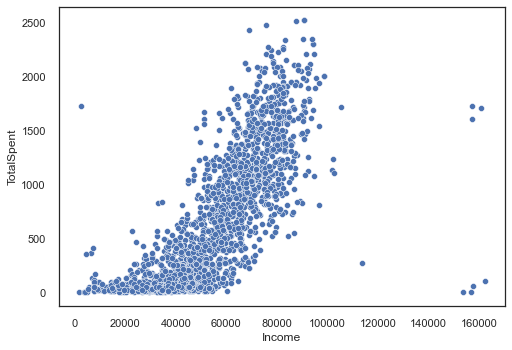

In [72]:
sns.scatterplot(x=df.Income,y=df.TotalSpent, palette='bright')

<AxesSubplot:xlabel='Income', ylabel='NumAllPurchases'>

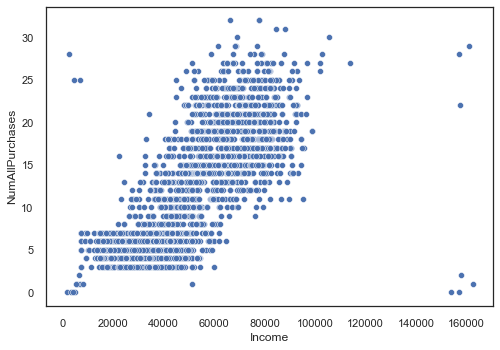

In [73]:
sns.scatterplot(x=df.Income,y=df.NumAllPurchases)

 ## checking in which campaign customer accepted the offer  and education

<AxesSubplot:xlabel='Age_Group', ylabel='NumDealsPurchases'>

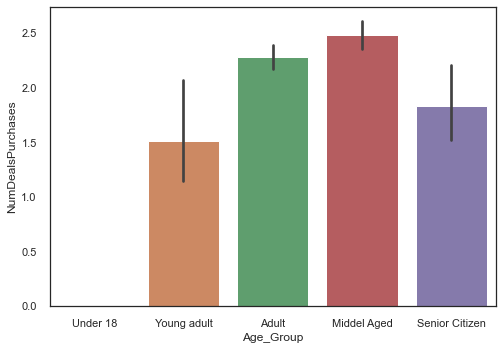

In [75]:
sns.barplot(x=df.Age_Group, y= df.NumDealsPurchases)